# 📊 Data Analysis
This notebook demonstrates a data analysis workflow using Python. The goal is to load a dataset, perform basic exploration, and visualize or summarize key insights.

### Loading a CSV File from a ZIP Archive
In this section, loaded a CSV file that is compressed within a ZIP archive. This is useful when datasets are distributed in compressed formats to save space or reduce download time.

The steps include:

1. **Determine the working directory**: Depending on whether this is run in a script or a notebook, locate the current base directory.
2. **Build the path** to the ZIP archive and the CSV file inside it.
3. **Use `zipfile.ZipFile`** to extract and load the CSV file into a pandas DataFrame.
4. **Handle encoding issues**: use the `latin1` encoding to avoid common Unicode errors when reading CSVs.

Error handling is included to ensure clear feedback is provided if the file or path is incorrect.

This pattern is helpful when automating data ingestion pipelines or working with zipped datasets shared across teams.

In [1]:
import os
import zipfile
import pandas as pd

# Step 1: Get the base directory relative to current script or notebook
base_dir = os.path.dirname(__file__) if '__file__' in globals() else os.getcwd()

# Step 2: Construct path to ZIP file and CSV inside it
zip_path = os.path.join(base_dir, "..", "002_data_raw", "archive.zip")
csv_filename = "Sample - Superstore.csv"

# Step 3: Load the CSV file with encoding handling
try:
    with zipfile.ZipFile(zip_path, 'r') as z:
        with z.open(csv_filename) as f:
            # Try with encoding that prevents misread characters
            df1 = pd.read_csv(f, encoding='latin1')  # or use 'latin1' if needed utf-8-sig
            print("✅ CSV loaded successfully.")
            print(df1.head())
except FileNotFoundError:
    print(f"ZIP file not found: {zip_path}")
except KeyError:
    print(f"{csv_filename} not found inside ZIP archive.")
except Exception as e:
    print(f"Error loading CSV from ZIP: {e}")


✅ CSV loaded successfully.
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Categ

###  Exporting the Processed Data to CSV


In [2]:
import os

# Get the current working directory or script location
base_dir = os.path.dirname(__file__) if '__file__' in globals() else os.getcwd()

# Build path to 004_outputs folder
output_dir = os.path.join(base_dir, "..", "003_data_processed")
os.makedirs(output_dir, exist_ok=True)

# Define output file path
output_file = os.path.join(output_dir, "exported_new_superstore_data.csv")

# Export the DataFrame with encoding that plays nicely with Excel
df1.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"CSV exported successfully to: {output_file}")


CSV exported successfully to: C:\Users\l_cla\Documents\001_projects\002_project_beta\001_notebooks\..\003_data_processed\exported_new_superstore_data.csv


### Data Cleaning: Handling Missing Values
_In this step, cleaned the dataset by identifying and handling missing or empty values._

In [3]:
import pandas as pd

# Assume your original DataFrame is named df

# Step 1: Replace empty strings (including spaces) with NaN
df1_cleaned = df1.replace(r'^\s*$', pd.NA, regex=True)

# Step 2: Count missing values per column
missing_counts = df1_cleaned.isna().sum()

# Step 3: Extract rows with any missing data
missing_rows = df1_cleaned[df1_cleaned.isna().any(axis=1)]

# Step 4: Display the results
print("🔍 Missing values per column:")
print(missing_counts)

print(f"\n🧾 Total rows with missing data: {len(missing_rows)}")

# Optional: Preview first few affected rows
print("\n🧪 Sample rows with missing data:")
print(missing_rows.head())


🔍 Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

🧾 Total rows with missing data: 0

🧪 Sample rows with missing data:
Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]


### Exploratory Sales Analysis
_This section performs a series of exploratory visualizations and summaries using sales data. The goal is to uncover patterns in monthly performance, category trends, regional profitability, and product-level insights._

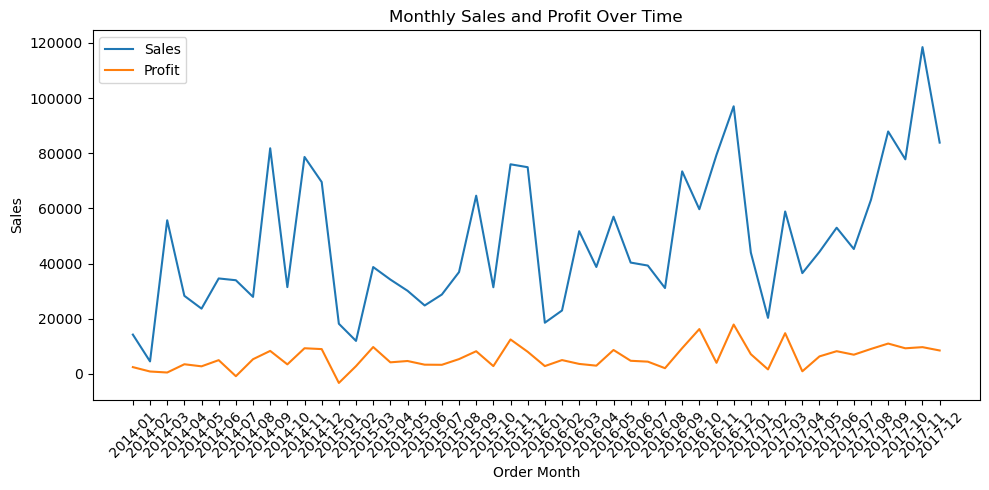

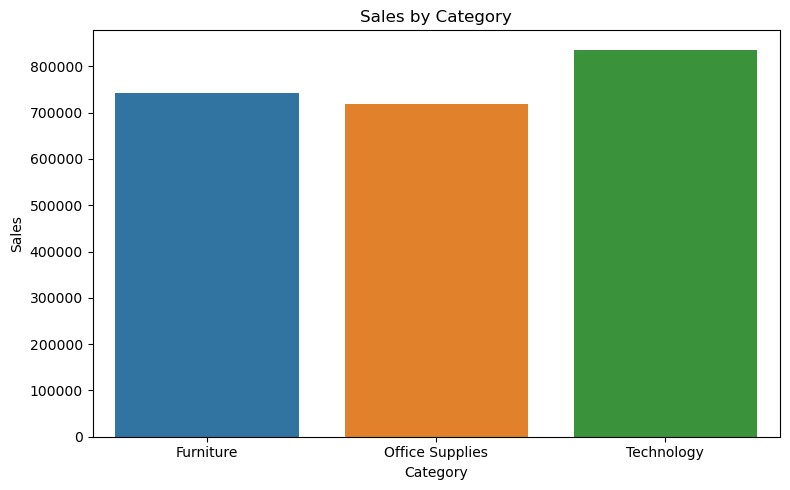

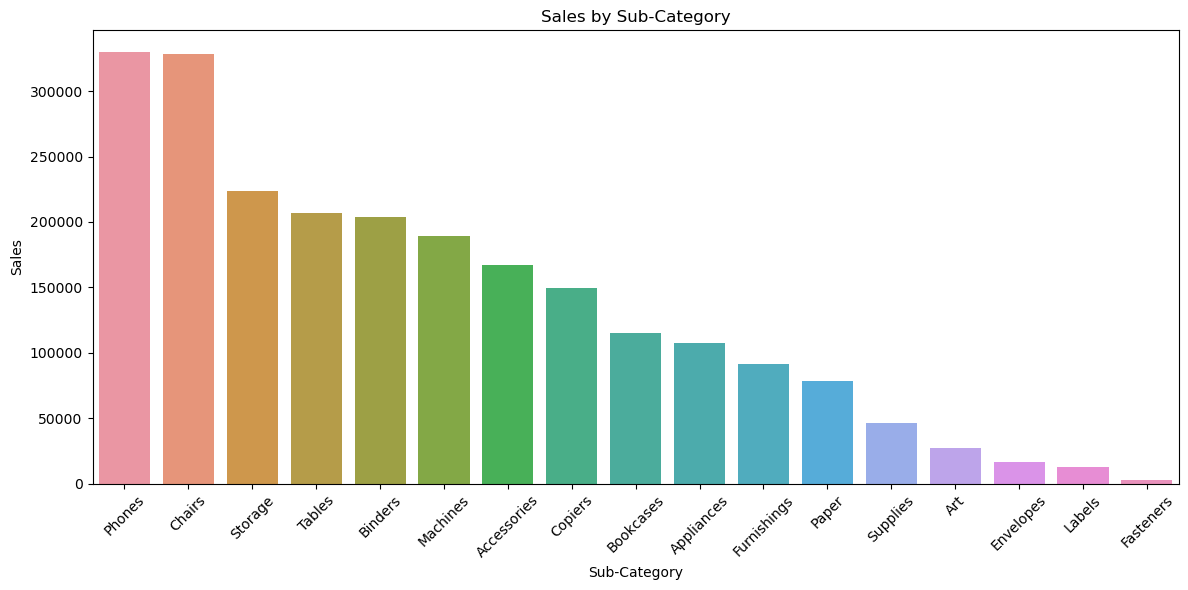

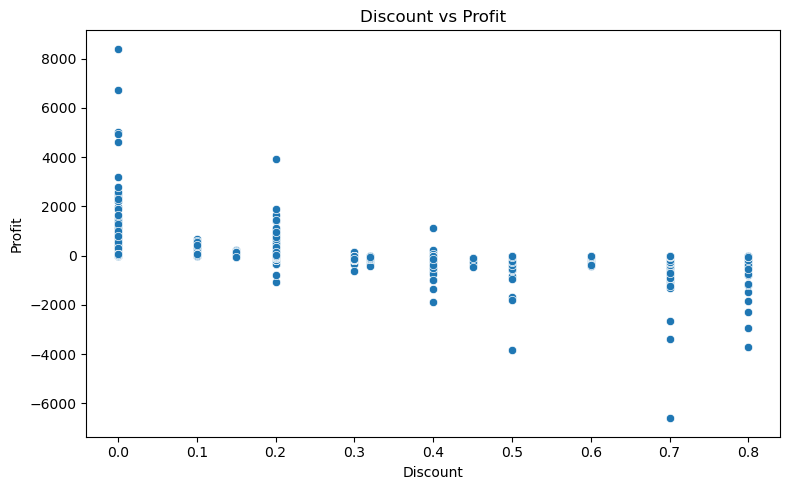

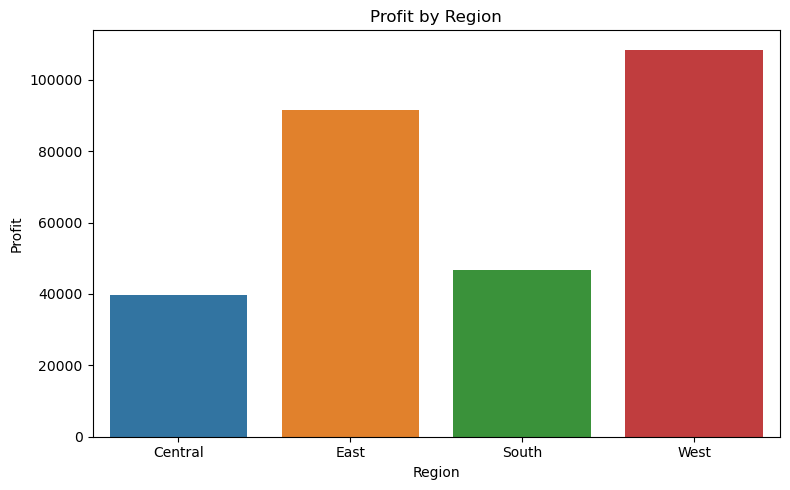

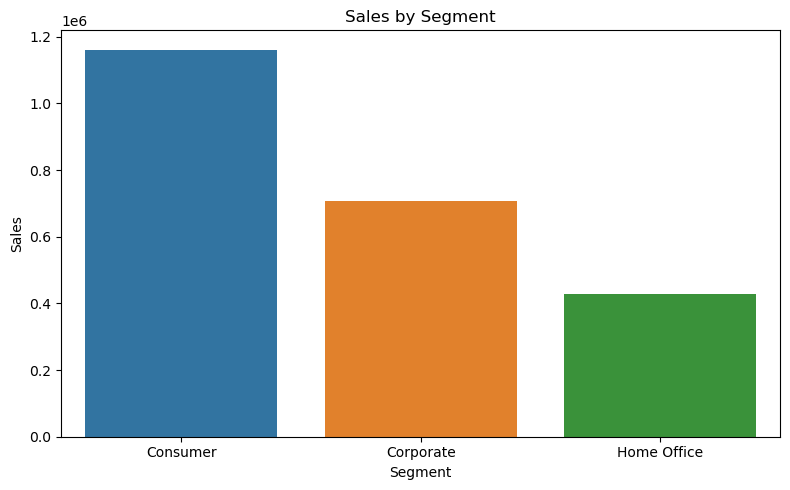

Top 10 Products by Profit:
                                                        Sales      Profit
Product Name                                                             
Canon imageCLASS 2200 Advanced Copier               61599.824  25199.9280
Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.384   7753.0390
Hewlett Packard LaserJet 3310 Copier                18839.686   6983.8836
Canon PC1060 Personal Laser Copier                  11619.834   4570.9347
HP Designjet T520 Inkjet Large Format Printer -...  18374.895   4094.9766
Ativa V4110MDD Micro-Cut Shredder                    7699.890   3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta    14299.890   3717.9714
Plantronics Savi W720 Multi-Device Wireless Hea...   9367.290   3696.2820
Ibico EPK-21 Electric Binding System                15875.916   3345.2823
Zebra ZM400 Thermal Label Printer                    6965.700   3343.5360

Bottom 10 Products by Profit:
                                                      

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns to datetime
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])

# Create a new column for Month-Year for time series analysis
df1['Order Month'] = df1['Order Date'].dt.to_period('M').astype(str)

# 1. Monthly Sales and Profit Over Time
monthly = df1.groupby('Order Month')[['Sales', 'Profit']].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly, x='Order Month', y='Sales', label='Sales')
sns.lineplot(data=monthly, x='Order Month', y='Profit', label='Profit')
plt.title('Monthly Sales and Profit Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Sales by Category
cat_sales = df1.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=cat_sales, x='Category', y='Sales')
plt.title('Sales by Category')
plt.tight_layout()
plt.show()

# 3. Sales by Sub-Category
subcat_sales = df1.groupby('Sub-Category')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=subcat_sales.sort_values(by='Sales', ascending=False), x='Sub-Category', y='Sales')
plt.title('Sales by Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Discount vs Profit Scatter
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df1, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.tight_layout()
plt.show()

# 5. Profit by Region
region_profit = df1.groupby('Region')['Profit'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=region_profit, x='Region', y='Profit')
plt.title('Profit by Region')
plt.tight_layout()
plt.show()

# 6. Sales by Segment
seg_sales = df1.groupby('Segment')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=seg_sales, x='Segment', y='Sales')
plt.title('Sales by Segment')
plt.tight_layout()
plt.show()

# 7. Top and Bottom Products by Profit
prod_profit = df1.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
top_products = prod_profit.head(10)
bottom_products = prod_profit.tail(10)

print("Top 10 Products by Profit:")
print(top_products)

print("\nBottom 10 Products by Profit:")
print(bottom_products)


### 🔍 Step 5: Code Explanation
_This cell performs a specific step in the analysis. Be sure to customize this description._

In [5]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot

# === Step 0: Load the data ===
base_dir = os.path.dirname(__file__) if '__file__' in globals() else os.getcwd()
data_path = os.path.join(base_dir, "..", "003_data_processed", "exported_new_superstore_data.csv")

df1 = pd.read_csv(data_path)

# === Step 1: Prepare the data ===
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])
df1['Order Month'] = df1['Order Date'].dt.to_period('M').astype(str)

# === Step 2: Create Plotly Figures ===

# 1. Monthly Sales and Profit
monthly = df1.groupby('Order Month')[['Sales', 'Profit']].sum().reset_index()
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=monthly['Order Month'], y=monthly['Sales'], mode='lines+markers', name='Sales'))
fig1.add_trace(go.Scatter(x=monthly['Order Month'], y=monthly['Profit'], mode='lines+markers', name='Profit'))
fig1.update_layout(title='Monthly Sales and Profit Over Time', xaxis_title='Order Month', yaxis_title='Amount')

# 2. Sales by Category
cat_sales = df1.groupby('Category')['Sales'].sum().reset_index()
fig2 = px.bar(cat_sales, x='Category', y='Sales', title='Sales by Category',
              color='Category', color_discrete_sequence=px.colors.qualitative.Set2)

# 3. Sales by Sub-Category
subcat_sales = df1.groupby('Sub-Category')['Sales'].sum().reset_index()
fig3 = px.bar(subcat_sales.sort_values(by='Sales', ascending=False), x='Sub-Category', y='Sales',
              title='Sales by Sub-Category',
              color='Sub-Category', color_discrete_sequence=px.colors.qualitative.Dark2)
fig3.update_layout(xaxis_tickangle=45)

# 4. Discount vs Profit
bins = [-0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0]
labels = ['<10%', '10–20%', '20–30%', '30–50%', '50–70%', '70–100%']
df1['Discount Band'] = pd.cut(df1['Discount'], bins=bins, labels=labels)

discount_profit_summary = (
    df1.groupby(['Sub-Category', 'Discount Band'])['Profit']
    .sum()
    .reset_index()
    .dropna()
)

fig4 = px.bar(
    discount_profit_summary,
    x='Sub-Category',
    y='Profit',
    color='Discount Band',
    title='Profit by Sub-Category and Discount Band',
    barmode='stack',
    text_auto='.2s',
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig4.update_layout(xaxis_tickangle=45, template='plotly_white', title_x=0.5)

# 4b. Styled Table
table_data = discount_profit_summary.copy()
discount_order = ['<10%', '10–20%', '20–30%', '30–50%', '50–70%', '70–100%']
table_data['Discount Band'] = pd.Categorical(table_data['Discount Band'], categories=discount_order, ordered=True)
table_data = table_data.sort_values(['Discount Band', 'Sub-Category'])
table_data['Profit'] = table_data['Profit'].round(2)

fig9 = go.Figure(data=[go.Table(
    header=dict(
        values=["<b>Sub-Category</b>", "<b>Discount Band</b>", "<b>Profit ($)</b>"],
        fill_color='#dfe6e9',
        font=dict(color='black', size=13),
        align='left',
        line_color='darkgrey'
    ),
    cells=dict(
        values=[
            table_data['Sub-Category'],
            table_data['Discount Band'],
            table_data['Profit']
        ],
        fill_color=[['white', '#f8f9fa'] * (len(table_data) // 2 + 1)],
        align='left',
        font=dict(size=12),
        line_color='lightgrey',
        height=28
    )
)])
fig9.update_layout(
    title='Detailed Profit by Sub-Category and Discount Band (Styled)',
    title_x=0.5,
    margin=dict(l=0, r=0, t=40, b=0)
)

# 5. Profit by Region
region_profit = df1.groupby('Region')['Profit'].sum().reset_index()
fig5 = px.bar(region_profit, x='Region', y='Profit', title='Profit by Region',
              color='Region', color_discrete_sequence=px.colors.qualitative.Bold)

# 6. Sales by Segment
seg_sales = df1.groupby('Segment')['Sales'].sum().reset_index()
fig6 = px.bar(seg_sales, x='Segment', y='Sales', title='Sales by Segment',
              color='Segment', color_discrete_sequence=px.colors.qualitative.Dark2)

# 7. Top and Bottom Products
prod_profit = df1.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
top_products_df = prod_profit.head(10).reset_index()
bottom_products_df = prod_profit.tail(10).reset_index()

fig7 = px.bar(top_products_df, x='Product Name', y='Profit', title='Top 10 Products by Profit',
              color='Product Name', color_discrete_sequence=px.colors.qualitative.Vivid)
fig7.update_layout(xaxis_tickangle=45)

fig8 = px.bar(bottom_products_df, x='Product Name', y='Profit', title='Bottom 10 Products by Profit',
              color='Product Name', color_discrete_sequence=px.colors.qualitative.Prism)
fig8.update_layout(xaxis_tickangle=45)

# 8. Horizontal Stacked Bar: Shipping Delay by Sub-Category and Ship Mode
df1['Ship Delay (Days)'] = (df1['Ship Date'] - df1['Order Date']).dt.days
ship_delay_grouped = df1.groupby(['Sub-Category', 'Ship Mode'])['Ship Delay (Days)'].mean().reset_index()
ship_delay_grouped['Ship Delay (Days)'] = ship_delay_grouped['Ship Delay (Days)'].round(1)

fig10 = px.bar(
    ship_delay_grouped.sort_values(by='Ship Delay (Days)', ascending=True),
    y='Sub-Category',
    x='Ship Delay (Days)',
    color='Ship Mode',
    orientation='h',
    title='Average Shipping Time by Sub-Category and Ship Mode (Horizontal)',
    barmode='stack',
    text='Ship Delay (Days)',
    color_discrete_sequence=px.colors.qualitative.Dark2
)
fig10.update_layout(title_x=0.5)

# === Step 3: Export HTML Report ===
report_dir = os.path.join(base_dir, "..", "005_reports")
os.makedirs(report_dir, exist_ok=True)
report_path = os.path.join(report_dir, "superstore_analysis.html")

figs = [fig1, fig2, fig3, fig4, fig9, fig5, fig6, fig7, fig8, fig10]
with open(report_path, "w", encoding="utf-8") as f:
    for fig in figs:
        f.write(plot(fig, include_plotlyjs='cdn', output_type='div'))

print(f" Report exported successfully to: {report_path}")

# === Step 4: Export Summary CSVs for Power BI (UTF-8 with BOM) ===
output_dir = os.path.join(base_dir, "..", "004_outputs")
os.makedirs(output_dir, exist_ok=True)

encoding = 'utf-8-sig'

monthly.to_csv(os.path.join(output_dir, "monthly_sales_profit.csv"), index=False, encoding=encoding)
cat_sales.to_csv(os.path.join(output_dir, "category_sales.csv"), index=False, encoding=encoding)
subcat_sales.to_csv(os.path.join(output_dir, "subcat_sales.csv"), index=False, encoding=encoding)
discount_profit_summary.to_csv(os.path.join(output_dir, "discount_profit_summary.csv"), index=False, encoding=encoding)
region_profit.to_csv(os.path.join(output_dir, "region_profit.csv"), index=False, encoding=encoding)
seg_sales.to_csv(os.path.join(output_dir, "segment_sales.csv"), index=False, encoding=encoding)
top_products_df.to_csv(os.path.join(output_dir, "top_10_products.csv"), index=False, encoding=encoding)
bottom_products_df.to_csv(os.path.join(output_dir, "bottom_10_products.csv"), index=False, encoding=encoding)
ship_delay_grouped.to_csv(os.path.join(output_dir, "shipping_delay_by_subcat_and_mode.csv"), index=False, encoding=encoding)

print(" Raw summary CSV files exported for Power BI (UTF-8 with BOM).")


 Report exported successfully to: C:\Users\l_cla\Documents\001_projects\002_project_beta\001_notebooks\..\005_reports\superstore_analysis.html
 Raw summary CSV files exported for Power BI (UTF-8 with BOM).
